### 3.1.1 Series

In [1]:
import pandas as pd                          # 导入pandas库
# 根据列表创建Series类对象
ser_obj = pd.Series(['Python', 'Java', 'PHP'])   
ser_obj

0    Python
1      Java
2       PHP
dtype: object

In [4]:
# 导入pandas库
import pandas as pd                          
# 创建Series类对象，同时为该对象指定索引
ser_obj = pd.Series(['Python', 'Java', 'PHP'],
index = ['one', 'two', 'three'])              
ser_obj

one      Python
two        Java
three       PHP
dtype: object

In [5]:
data = {'one': 'Python', 'two': 'Java', 'three': 'PHP'}
ser_obj2 = pd.Series(data)          # 根据字典创建Series类对象
ser_obj2

one      Python
two        Java
three       PHP
dtype: object

In [6]:
import pandas as pd
from datetime import datetime
# 创建时间戳索引
date_index = pd.to_datetime(['20180820', '20180828', '20180908'])
print(date_index)
# 创建Series类对象，指定索引为时间戳索引
date_ser = pd.Series([11, 22, 33], index=date_index)
print(date_ser)

DatetimeIndex(['2018-08-20', '2018-08-28', '2018-09-08'], dtype='datetime64[ns]', freq=None)
2018-08-20    11
2018-08-28    22
2018-09-08    33
dtype: int64


### 3.1.2 DataFrame

In [7]:
import numpy as np
import pandas as pd
# 创建二维数组
demo_arr = np.array([['a', 'b', 'c'], ['d', 'e', 'f']])    
df_obj = pd.DataFrame(demo_arr)       # 根据二维数组创建DataFrame类对象
df_obj

,0,1,2
0,a,b,c
1,d,e,f


In [8]:
# 创建DataFrame类对象，同时指定行索引与列索引
df_obj = pd.DataFrame(demo_arr, index = ['row_01','row_02'],
                          columns=['col_01', 'col_02', 'col_03'])
df_obj

,col_01,col_02,col_03
row_01,a,b,c
row_02,d,e,f


### 3.2.1 索引对象

In [9]:
import  pandas as pd
tuple_clo = [('a', 0),('a', 1),('b', 2),('b', 2)]
tuple_row = [('a', 0),('a', 1),('b', 2),('b', 2)]
# pandas，构造MultiIndex的四种方法：from_tuples、from_arrays、from_product、from_frame
# from_tuples：列表中的每一个元组，作为MultiIndex（一对元组，为一个索引）
multi_index_col = pd.MultiIndex.from_tuples(tuples=tuple_clo)
multi_index_row = pd.MultiIndex.from_tuples(tuples=tuple_row)
data = [['A','B','C','D'],['E','F','G','H'],
         ['I','J','K','L'],['M','N','O','P']]
df = pd.DataFrame(data,index=multi_index_col,columns=multi_index_row)
df

a     b   
     0  1  2  2
a 0  A  B  C  D
  1  E  F  G  H
b 2  I  J  K  L
  2  M  N  O  P

### 3.2.2 使用单层索引访问数据

In [10]:
import pandas as pd
ser = pd.Series(['A','B','C','D'],
               index=['one','two','three','four'])
print(ser)

one      A
two      B
three    C
four     D
dtype: object


In [11]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=[4, 5, 6], columns=['A', 'B', 'C'])
print(df)

    A   B   C
4   0   2   3
5   0   4   1
6  10  20  30


In [12]:
# 访问列索引为'A'的数据
print(df['A'])

4     0
5     0
6    10
Name: A, dtype: int64


In [13]:
# 访问标签索引为two的数据
print(ser.loc['two'])

B


In [14]:
# 访问整数索引为2的数据
print(ser.iloc[2])

C


In [15]:
# 访问标签索引为4的数据
print(df.loc[4])

A    0
B    2
C    3
Name: 4, dtype: int64


In [14]:
# 访问整数索引为1的数据
print(df.iloc[1])

A    0
B    4
C    1
Name: 5, dtype: int64


In [15]:
# 访问行标签索引为5、列标签索引为'B'的数据
print(df.at[5, 'B'])

4


In [16]:
# 访问行整数索引为1、列整数索引为'B'的数据
print(df.iat[1,1])

4


### 3.2.3 使用分层索引访问数据

In [16]:
mult_series = pd.Series([95, 103, 80, 80, 90, 91, 91],
               index=[['计算机专业', '计算机专业', '计算机专业', '计算机专业',
                         '体育专业', '体育专业', '体育专业'],
                        ['物联网工程', '软件工程', '网络安全', '信息安全',
                         '体育教育', '休闲体育', '运动康复']])
print(mult_series)

计算机专业  物联网工程     95
       软件工程     103
       网络安全      80
       信息安全      80
体育专业   体育教育      90
       休闲体育      91
       运动康复      91
dtype: int64


In [17]:
# 访问第一层索引为'计算机专业'的数据
print(mult_series['计算机专业'])

物联网工程     95
软件工程     103
网络安全      80
信息安全      80
dtype: int64


In [19]:
# 访问第二层索引为'软件工程'的数据
print(mult_series['计算机专业']['软件工程'])

103


In [18]:
import numpy as np
arrays = ['a','a','b','b'],[1,2,1,2]
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                 index=pd.MultiIndex.from_arrays(arrays),
                 columns=[['A','A','B'],
                           ['Green','Red','Green']])
print(frame)

        A         B
    Green Red Green
a 1     0   1     2
  2     3   4     5
b 1     6   7     8
  2     9  10    11


In [21]:
# 访问第一层索引为'A'的数据
print(frame['A'])

     Green  Red
a 1      0    1
  2      3    4
b 1      6    7
  2      9   10


In [19]:
# 访问'A'嵌套的索引为'Green'的数据
print(frame['A']['Green'])

a  1    0
   2    3
b  1    6
   2    9
Name: Green, dtype: int32


In [20]:
# 访问列索引标签为a的数据，第一层索引
print(frame.loc['a'])

      A         B
  Green Red Green
1     0   1     2
2     3   4     5


In [24]:
# 访问列索引标签为A的数据，第二层索引
print(frame.loc['a', 'A'])

   Green  Red
1      0    1
2      3    4


In [25]:
frame.iloc[2]

A  Green    6
   Red      7
B  Green    8
Name: (b, 1), dtype: int32

### 3.2.4 重新索引

In [21]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200, 200, 404, 404, 301],
                       'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                        index=index)
print('重新索引前：')
print(df)
print('--------------')
# 重新索引
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10','Chrome']
new_df = df.reindex(new_index)
print('重新索引后：')
print(new_df)

重新索引前：
           http_status  response_time
Firefox            200           0.04
Chrome             200           0.02
Safari             404           0.07
IE10               404           0.08
Konqueror          301           1.00
--------------
重新索引后：
               http_status  response_time
Safari               404.0           0.07
Iceweasel              NaN            NaN
Comodo Dragon          NaN            NaN
IE10                 404.0           0.08
Chrome               200.0           0.02


In [22]:
# 通过fill_value参数，使用指定值对缺失值进行填充
new_df = df.reindex(new_index, fill_value='missing')
print(new_df)

              http_status response_time
Safari                404          0.07
Iceweasel         missing       missing
Comodo Dragon     missing       missing
IE10                  404          0.08
Chrome                200          0.02


In [23]:
col_df = df.reindex(columns=['http_status', 'user_agent'])
print(col_df)

           http_status  user_agent
Firefox            200         NaN
Chrome             200         NaN
Safari             404         NaN
IE10               404         NaN
Konqueror          301         NaN


### 3.3.1 按索引排序

In [29]:
df = pd.DataFrame(np.arange(9).reshape((3, 3)), 
                     columns=['c', 'a', 'b'],index=['B','C','A'])
# 显示创建的df对象
print(df)
print('--------------')
row_sort =df.sort_index()
print(row_sort)

   c  a  b
B  0  1  2
C  3  4  5
A  6  7  8
--------------
   c  a  b
A  6  7  8
B  0  1  2
C  3  4  5


In [30]:
col_sort = df.sort_index(axis=1)
col_sort

,a,b,c
B,1,2,0
C,4,5,3
A,7,8,6


### 3.3.2 按值排序

In [31]:
import numpy as np
df = pd.DataFrame({'col_A':[1,1,4,6],
                       'col_B':[4,np.nan,4,2],
                       'col_C':[6,3,8,0]})
df

,col_A,col_B,col_C
0,1,4.0,6
1,1,NaN,3
2,4,4.0,8
3,6,2.0,0


In [32]:
new_df = df.sort_values(by='col_B')
new_df

,col_A,col_B,col_C
3,6,2.0,0
0,1,4.0,6
2,4,4.0,8
1,1,NaN,3


In [33]:
df.sort_values(by='col_B', na_position='first')

,col_A,col_B,col_C
1,1,NaN,3
3,6,2.0,0
0,1,4.0,6
2,4,4.0,8


### 3.4.1 常见的统计计算

In [34]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'col_A':[2,34,25,4],
                       'col_B':[0,3,45,9],
                       'col_C':[7,5,5,3]},
                       index=['A','B','C','D'])
df

,col_A,col_B,col_C
A,2,0,7
B,34,3,5
C,25,45,5
D,4,9,3


In [35]:
df.max()  # 获取各每列的最大值

col_A    34
col_B    45
col_C     7
dtype: int64

In [36]:
df.idxmax()  # 获取每列最大值对应的行索引

col_A    B
col_B    C
col_C    A
dtype: object

### 3.4.2 统计描述

In [37]:
df_obj = pd.DataFrame({'object':['a', 'b', 'c', 'c'], 
                           'number':[-1, 7, 50, 36],
                           'category':pd.Categorical(['apple', 'banana', 'orange', 'peach'])})
df_obj.describe()

,number
count,4.000000
mean,23.000000
std,24.013885
min,-1.000000
25%,5.000000
50%,21.500000
75%,39.500000
max,50.000000


## 3.5绘制图表

In [38]:
import pandas as pd
df = pd.DataFrame({'商品A':[2,34,25,4],
                    '商品B':[1,3,45,9],
                    '商品C':[7,5,5,3]},
                    index=['第1季度','第2季度','第3季度','第4季度'])
df

,商品A,商品B,商品C
第1季度,2,1,7
第2季度,34,3,5
第3季度,25,45,5
第4季度,4,9,3


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='季度', ylabel='销售额（万元）'>

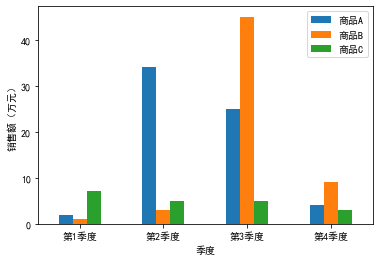

In [39]:
# 导入matplotlib库
import matplotlib.pyplot as plt
# 设置显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
df.plot(kind='bar', xlabel='季度', ylabel='销售额（万元）', rot=0)

<AxesSubplot:ylabel='销售额（万元）'>

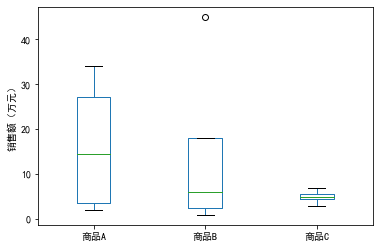

In [40]:
df.plot(kind='box', ylabel='销售额（万元）')